In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

In [3]:

dataset = pd.read_csv('heart(1).csv')
df=dataset.copy()


2.Data Loading

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3.Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:


df["sex"].value_counts()



1    207
0     96
Name: sex, dtype: int64

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='age'>

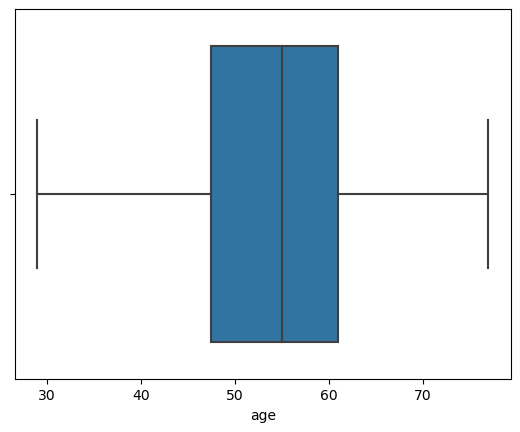

In [13]:
sns.boxplot(x=df["age"])

From the boxplot graph, we observed that there is no outlier for age, let's test it anyway.

In [15]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
print(IQR)

13.5


In [18]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
print(lower_lim,upper_lim)

27.25 81.25


In [19]:


df["age"][(df["age"]<lower_lim) | (df["age"]>upper_lim)]



Series([], Name: age, dtype: int64)

<AxesSubplot:xlabel='trestbps'>

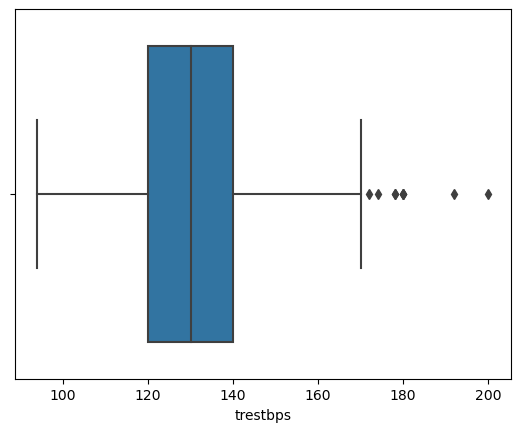

In [20]:
sns.boxplot(x=df["trestbps"])

We observed outliers for resting blood pressure (trtbps) from the boxplot chart, now let's eliminate them.

In [22]:
Q1=df["trestbps"].quantile(0.25)
Q3=df["trestbps"].quantile(0.75)
IQR=Q3-Q1
IQR

20.0

In [23]:


low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR



In [24]:


df["trestbps"][(df["trestbps"]<low_lim) | (df["trestbps"]>up_lim)]



8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64

In [26]:
len(df["trestbps"][(df["trestbps"]<low_lim) | (df["trestbps"]>up_lim)])

9

We detected 9 outliers,Now let's follow a path like this; Let's replace the values ​​below the lower limit with the lower limit, and the values ​​above the upper limit with the upper limit.

In [27]:
out_low=df["trestbps"]<low_lim
df["trestbps"][out_low]

Series([], Name: trestbps, dtype: int64)

In [28]:

out_up=df["trestbps"]>up_lim
df["trestbps"][out_up]



8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64

no outliers below the lower limit, all above the upper limit...

In [29]:
df["trestbps"][out_up]=up_lim

In [30]:
df["trestbps"][(df["trestbps"]<low_lim) | (df["trestbps"]>up_lim)]

Series([], Name: trestbps, dtype: int64)



    We've fixed the outlier problem...



<AxesSubplot:xlabel='chol'>

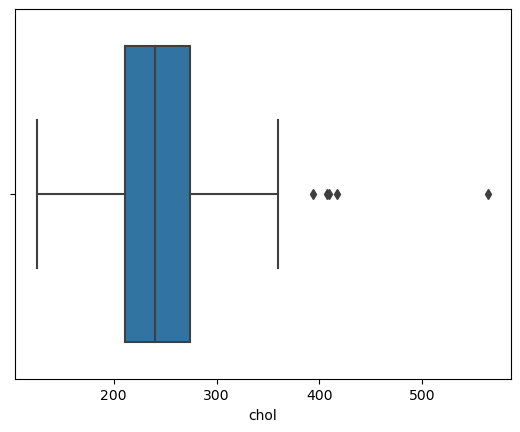

In [31]:
sns.boxplot(x=df["chol"])



    From the boxplot plot, we observed outliers for cholesterol...

In [32]:
Q1=df["chol"].quantile(0.25)
Q3=df["chol"].quantile(0.75)
IQR=Q3-Q1
IQR

63.5

In [40]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(f"low_limit:{low_lim},\n up_limit:{up_lim}")

low_limit:115.75,
 up_limit:369.75


In [41]:
df["chol"][(df["chol"]<low_lim) | (df["chol"]>up_lim)]

28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

We have 5 outliers, as we can see from the boxplot chart, above the upper limit

Now let's replace the values ​​above the upper limit with the upper limit...

In [42]:


out_up=df["chol"]>up_lim
df["chol"][out_up]=up_lim



In [43]:


len(df["chol"][(df["chol"]<low_lim) | (df["chol"]>up_lim)])



0

We've fixed the outlier problem...

<AxesSubplot:xlabel='thalach'>

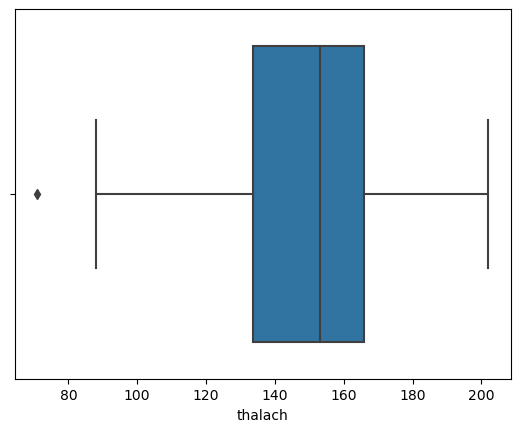

In [45]:

sns.boxplot(x=df["thalach"])



    From the boxplot we observed an outlier for maximum heart rate (thalachh) (just below the lower limit)...

In [47]:
Q1=df["thalach"].quantile(0.25)
Q3=df["thalach"].quantile(0.75)
IQR=Q3-Q1
IQR

32.5

In [48]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR


print(f"low_limit:{low_lim},up_limit:{up_lim}")

low_limit:84.75,up_limit:214.75


In [49]:
df["thalach"][(df["thalach"]<low_lim) | (df["thalach"]>up_lim)]

272    71
Name: thalach, dtype: int64

We have 1 outlier, let's replace it with the lower limit immediately...

In [51]:
df["thalach"][272]=85

In [52]:
df["thalach"][(df["thalach"]<low_lim) | (df["thalach"]>up_lim)]

Series([], Name: thalach, dtype: int64)

We've fixed the outlier problem...

<AxesSubplot:xlabel='oldpeak'>

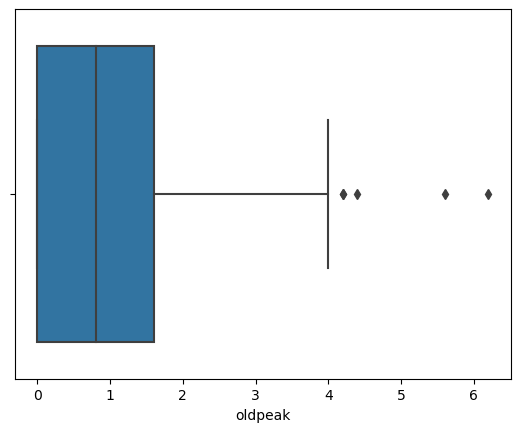

In [53]:
sns.boxplot(x=df["oldpeak"])

We observed an outlier above the upper limit from the boxplot control...

In [54]:
Q1=df["oldpeak"].quantile(0.25)
Q3=df["oldpeak"].quantile(0.75)
IQR=Q3-Q1
IQR

1.6

In [55]:


low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR


print(f"low_limit:{low_lim},up_limit:{up_lim}")



low_limit:-2.4000000000000004,up_limit:4.0


In [56]:
df["oldpeak"][(df["oldpeak"]<low_lim) | (df["oldpeak"]>up_lim)]

101    4.2
204    6.2
221    5.6
250    4.2
291    4.4
Name: oldpeak, dtype: float64

There are 5 outliers above the upper bound.

In [57]:


out_up=df["oldpeak"]>up_lim
df["oldpeak"][out_up]=up_lim



In [58]:


len(df["oldpeak"][(df["oldpeak"]<low_lim) | (df["oldpeak"]>up_lim)])



0

We have eliminated outlier problems...

4.Data Visualize

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


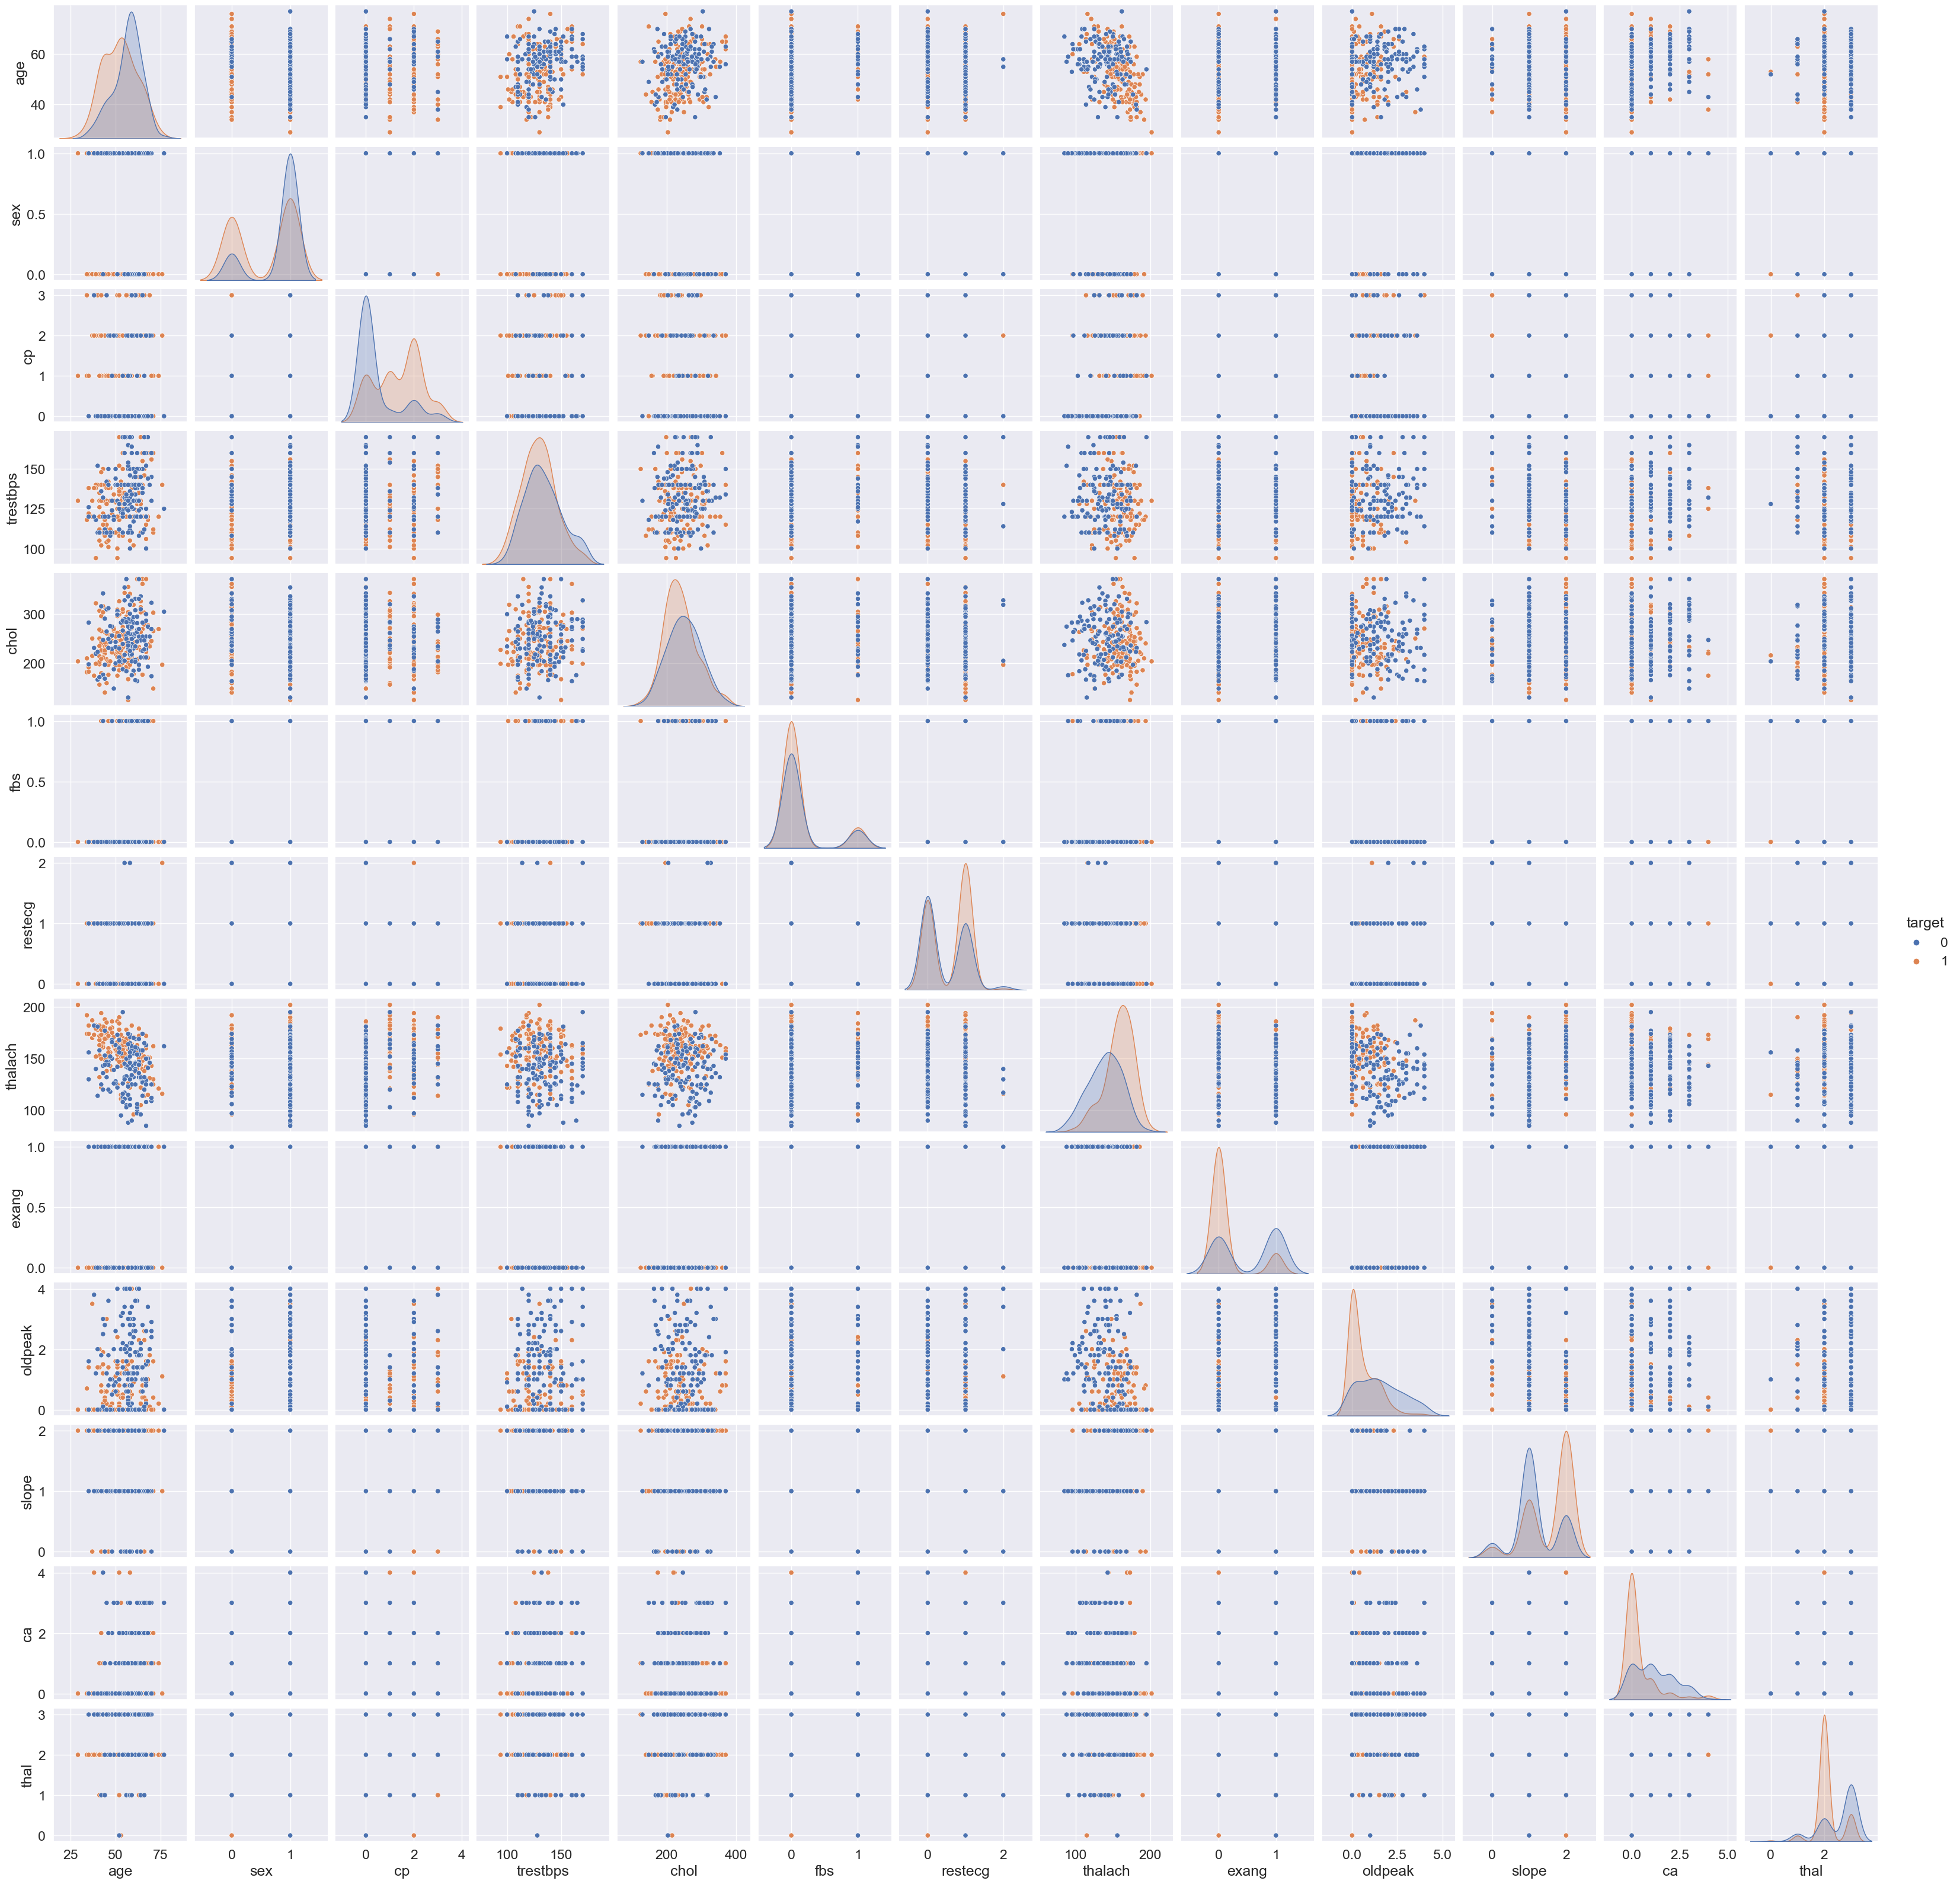

In [68]:
sns.pairplot(df,hue="target",diag_kind="kde")
plt.show()



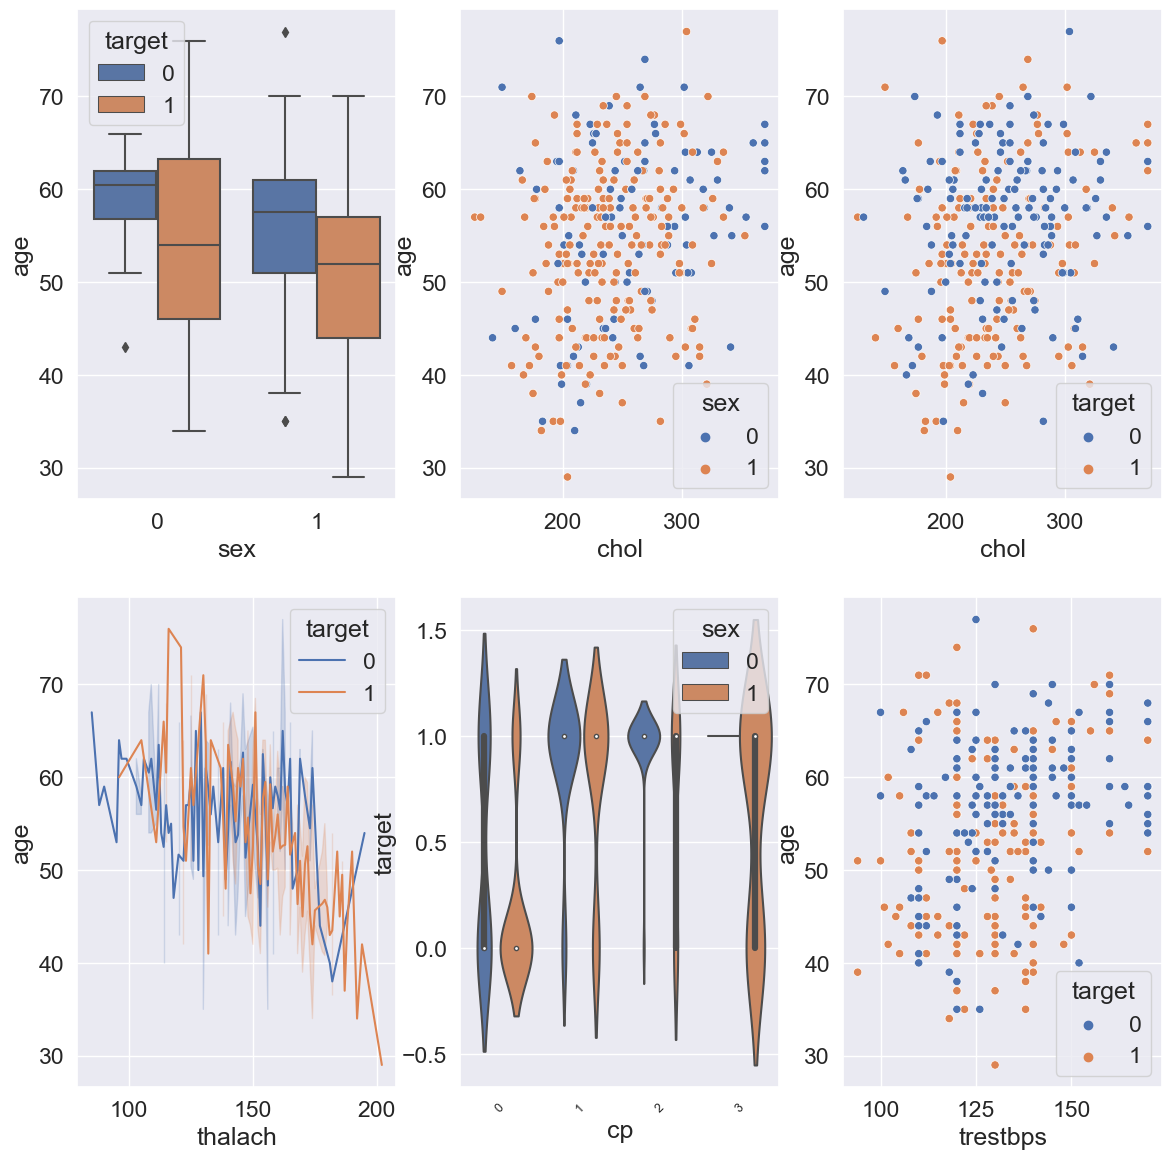

In [72]:
plt.figure(figsize=(14,14))
plt.subplot(2,3,1)
sns.boxplot(x = 'sex', y = 'age', data = df,hue="target")
plt.subplot(2,3,2)
sns.scatterplot(x = 'chol', y = 'age', data = df,hue="sex")
plt.subplot(2,3,3)
sns.scatterplot(x = 'chol', y = 'age', data = df,hue="target")
plt.subplot(2,3,4)
sns.lineplot(x = 'thalach', y = 'age', data = df,hue="target")
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'target', data = df,hue="sex")
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.scatterplot(x = 'trestbps', y = 'age', data = df,hue="target")

plt.show()

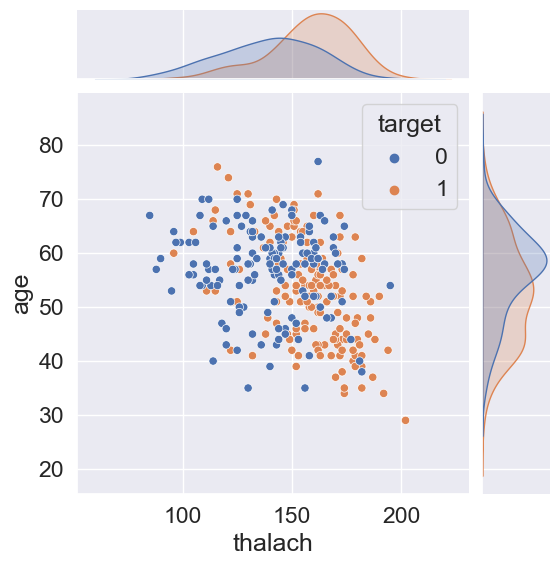

In [73]:


sns.jointplot(x = 'thalach', y = 'age', data = df,hue="target")



Corelation Analysis

In [74]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.286134,0.205856,0.121308,-0.116211,-0.398237,0.096801,0.213242,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.047594,-0.180779,0.045032,-0.058196,-0.042917,0.141664,0.105256,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.056267,-0.094081,0.094444,0.044421,0.295745,-0.394280,-0.144957,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.286134,-0.047594,0.056267,1.000000,0.132934,0.168393,-0.116535,-0.053747,0.055354,0.180601,-0.113723,0.102909,0.050339,-0.138621
chol,0.205856,-0.180779,-0.094081,0.132934,1.000000,0.015189,-0.140696,-0.019552,0.083809,0.057323,0.005704,0.077680,0.089103,-0.103987
fbs,0.121308,0.045032,0.094444,0.168393,0.015189,1.000000,-0.084189,-0.009471,0.025665,0.011732,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.116535,-0.140696,-0.084189,1.000000,0.046234,-0.070733,-0.062437,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398237,-0.042917,0.295745,-0.053747,-0.019552,-0.009471,0.046234,1.000000,-0.382651,-0.351534,0.387937,-0.215993,-0.098099,0.422214
exang,0.096801,0.141664,-0.394280,0.055354,0.083809,0.025665,-0.070733,-0.382651,1.000000,0.299565,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.213242,0.105256,-0.144957,0.180601,0.057323,0.011732,-0.062437,-0.351534,0.299565,1.000000,-0.573853,0.218187,0.208407,-0.436680


<AxesSubplot:>

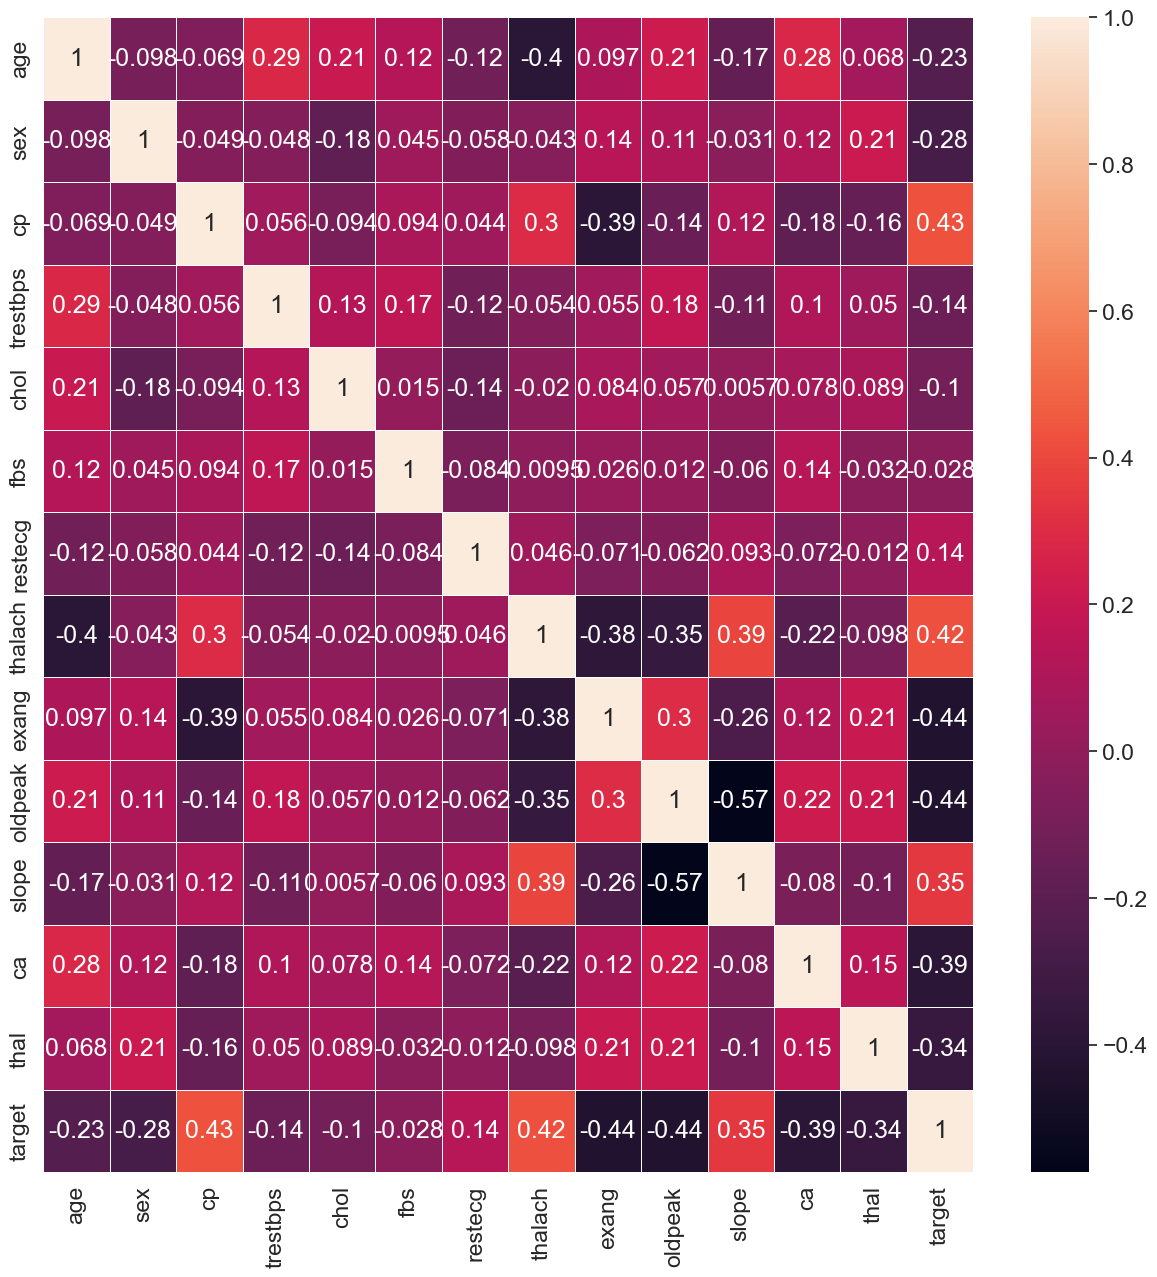

In [76]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.6)

MODELLİNG

In [77]:
X=df.drop("target",axis=1)
y=df["target"]

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler #Standardization of the data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


Logistic Regressor

In [99]:


log=LogisticRegression().fit(X_train,y_train)



In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
#log params  (RandomSearch vs Gridsearchcv)
log_params={
    "C":[1,2,3,4,5,0,5,2,5,6,7,8],
    "penalty":["l1","l2","elasticnet"],
    "solver":["lbfgs","liblinear"]
}

In [108]:


#Randomsearch
log_rs_cv=RandomizedSearchCV(log,log_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)



Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [109]:
log_rs_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [110]:
log_tun_rs=LogisticRegression(solver="liblinear",penalty="l2",C=1).fit(X_train,y_train)

In [111]:
y_pred=log_tun_rs.predict(X_test)
accuracy_score(y_test,y_pred)



0.8131868131868132

In [112]:
#for Gridsearchcv 
log_gs_cv=GridSearchCV(log,log_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)



Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [113]:
log_gs_cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [115]:


log_tun_gs=LogisticRegression(C=1,penalty="l1",solver="liblinear").fit(X_train,y_train)



In [116]:
y_pred=log_tun_gs.predict(X_test)
accuracy_score(y_test,y_pred)

0.8131868131868132

mix UP

In [122]:

from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score

In [118]:


classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []



In [124]:
Recall=recall_score(y_test, y_pred) 
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.85
Support Vector Classifier:
F1 score: 0.83
Decision Tree Classifier:
F1 score: 0.72
Random Forest Classifier:
F1 score: 0.83
Gradient Boosting Classifier:
F1 score: 0.76


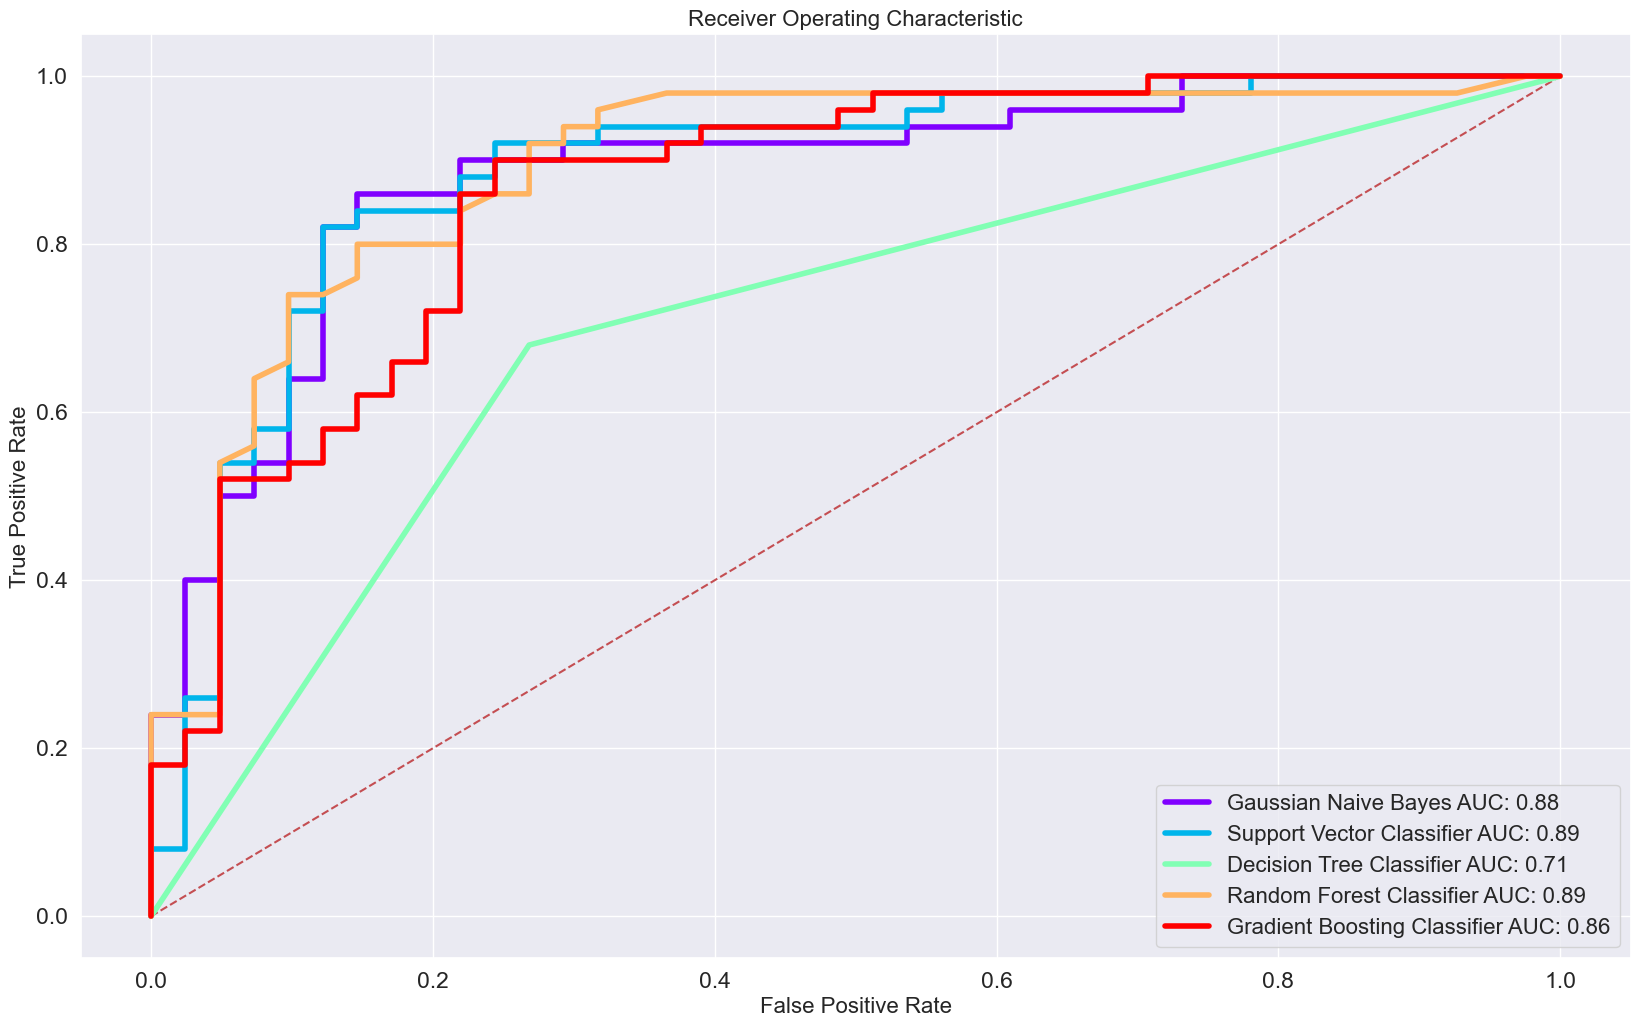

In [134]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (20, 12))
plt.plot([0,1], [0,1], 'r--')

for i in range(len(classifiers)):
    classifier = classifiers[i]
    probs = classifier.predict_proba(X_test)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = classifier_names[i] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[i], label = label, linewidth = 4)
    
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)